<a href="https://colab.research.google.com/github/DanielaJim07/Simulaci-n-I/blob/main/TABLERO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tablero de colores **


Supongamos que tenemos un tablero con cuatro sectores de colores. Lanzamos dos monedas y avanzamos, en sentido horario, el número de caras que aparezcan. Si repetimos el procedimiento muchas veces...

 **¿Son todos los sectores igual de probables cuando pase mucho tiempo?**


In [4]:
import random
import matplotlib.pyplot as plt


In [5]:
# Semilla para reproducibilidad
random.seed(42)

# Número de simulaciones (pasos en el tablero)
num_pasos = 100_000

# Lista para contar cuántas veces se visita cada sector
sectores = [0, 0, 0, 0]

# Estado inicial
posicion_actual = 0


In [6]:
# Simulación
for _ in range(num_pasos):
    # Lanzar dos monedas (0 = sol, 1 = águila)
    cara1 = 1 if random.random() < 0.5 else 0
    cara2 = 1 if random.random() < 0.5 else 0
    avance = cara1 + cara2

    # Mover en sentido horario
    posicion_actual = (posicion_actual + avance) % 4

    # Contar la visita al sector
    sectores[posicion_actual] += 1


In [7]:

# Calcular distribución empírica
total = sum(sectores)
distribucion = [count / total for count in sectores]



Visitas por sector: [24895, 24948, 25260, 24897]
Distribución empírica: [0.24895, 0.24948, 0.2526, 0.24897]


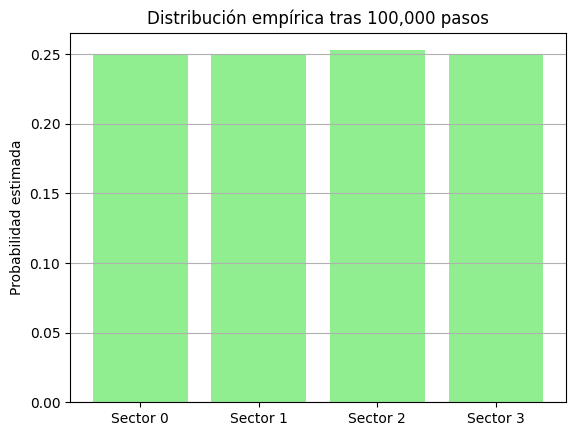

In [8]:
#  Resultados
print("Visitas por sector:", sectores)
print("Distribución empírica:", distribucion)

# Graficar
plt.bar(['Sector 0', 'Sector 1', 'Sector 2', 'Sector 3'], distribucion, color='lightgreen')
plt.title(f'Distribución empírica tras {num_pasos:,} pasos')
plt.ylabel('Probabilidad estimada')
plt.grid(axis='y')
plt.show()

Se realizó una simulación del juego para simular lanzamientos de dos monedas en cada paso. Cada resultado determina cuántas posiciones se avanza en el tablero circular de 4 sectores. Después de 100,000 tiradas, se calcula cuántas veces se visitó cada sector y se estima su probabilidad relativa.

Los resultados muestran que, en el largo plazo, la distribución tiende a ser uniforme:

$$\pi \approx \left[\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4}\right]$$

Esto respalda la conclusión analítica: todos los sectores son igual de probables después de mucho tiempo.

#SOLUCION ANALITICA
## Solución analítica por medio de cadenas de Markov

### Variable de estado

La variable de estado es la **posición de la ficha**. Las posibles posiciones son:

- **Rojo**
- **Naranja**
- **Azul**
- **Verde**

Los posibles estados después de un movimiento se representan como pares:

- `C C`, `C X`, `X C`, `X X`

Cada uno con la siguiente probabilidad:

$$
p = \begin{cases}
\frac{1}{4} & \text{(C C)} \\
\frac{1}{2} & \text{(C X, X C)} \\
\frac{1}{4} & \text{(X X)}
\end{cases}
$$

---

### Definimos

Denotamos:

- $ X_n $: Probabilidad de estar en el sector **naranja** después de \( n \) lanzamientos.  
- $ Y_n $: Probabilidad de estar en el sector **azul** después de \( n \) lanzamientos.  
- $ Z_n $: Probabilidad de estar en el sector **verde** después de \( n \) lanzamientos.  
- $ T_n $: Probabilidad de estar en el sector **rojo** después de \( n \) lanzamientos.  

---

### Teorema de la Probabilidad Total

$$
P(A) = P(A \cap B_1) + P(A \cap B_2) + \ldots + P(A \cap B_n)
$$

Por ejemplo, para $ X_1 = P(\text{Naranja}) $:

$$
X_1 = P(\text{Naranja}|\text{Naranja}) P(\text{Naranja})
+ P(\text{Naranja}|\text{Azul}) P(\text{Azul})
+ P(\text{Naranja}|\text{Verde}) P(\text{Verde})
+ P(\text{Naranja}|\text{Rojo}) P(\text{Rojo})
$$

Sustituyendo:

$$
X_1 = \frac{1}{4} X_0 + 0 \cdot Y_0 + \frac{1}{4} Z_0 + \frac{1}{2} T_0
$$

De forma similar:

$$
Y_1 = \frac{1}{2} X_0 + \frac{1}{4} Y_0 + 0 \cdot Z_0 + \frac{1}{4} T_0
$$

$$
Z_1 = \frac{1}{4} X_0 + \frac{1}{2} Y_0 + \frac{1}{4} Z_0 + 0 \cdot T_0
$$

$$
T_1 = 0 \cdot X_0 + \frac{1}{4} Y_0 + \frac{1}{2} Z_0 + \frac{1}{4} T_0
$$

---

### Para $ n = 2 $

$$
\begin{aligned}
X_2 &= \frac{1}{4} X_1 + 0 \cdot Y_1 + \frac{1}{4} Z_1 + \frac{1}{2} T_1 \\
Y_2 &= \frac{1}{2} X_1 + \frac{1}{4} Y_1 + 0 \cdot Z_1 + \frac{1}{4} T_1 \\
Z_2 &= \frac{1}{4} X_1 + \frac{1}{4} Y_1 + \frac{1}{4} Z_1 + 0 \cdot T_1 \\
T_2 &= 0 \cdot X_1 + \frac{1}{4} Y_1 + \frac{1}{2} Z_1 + \frac{1}{4} T_1
\end{aligned}
$$

---

### Forma matricial

$$
\begin{pmatrix}
X_n \\
Y_n \\
Z_n \\
T_n \\
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4}
\end{pmatrix}
\begin{pmatrix}
X_{n-1} \\
Y_{n-1} \\
Z_{n-1} \\
T_{n-1}
\end{pmatrix}
$$

---

### Simplificación:

$$
\mathbf{X}_n = A \cdot \mathbf{X}_{n-1} = A^2 \cdot \mathbf{X}_{n-2} = \dots = A^n \cdot \mathbf{X}_0
$$



In [10]:
import numpy as np

# Definimos la matriz de transición A
A = np.array([
    [1/4, 0,   1/4, 1/2],
    [1/2, 1/4, 0,   1/4],
    [1/4, 1/2, 1/4, 0],
    [0,   1/4, 1/2, 1/4]
])

# Estado inicial: la ficha empieza en NARANJA
# Vector: [P(Naranja), P(Azul), P(Verde), P(Rojo)]
X0 = np.array([1, 0, 0, 0])  # 100% en naranja

# Número de pasos (lanzamientos)
n = 10

# Evolucionamos la cadena de Markov
Xn = np.linalg.matrix_power(A, n) @ X0

# Mostramos el resultado
etiquetas = ['Naranja', 'Azul', 'Verde', 'Rojo']
for i, p in enumerate(Xn):
    print(f"Probabilidad de estar en {etiquetas[i]} después de {n} lanzamientos: {p:.4f}")


Probabilidad de estar en Naranja después de 10 lanzamientos: 0.2495
Probabilidad de estar en Azul después de 10 lanzamientos: 0.2500
Probabilidad de estar en Verde después de 10 lanzamientos: 0.2505
Probabilidad de estar en Rojo después de 10 lanzamientos: 0.2500
